In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from google.colab import files
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [ ]:
uploaded = files.upload()

Saving Cleaned_Data_Pathrise (3).xlsx to Cleaned_Data_Pathrise (3) (1).xlsx


In [ ]:
df = pd.read_csv("Cleaned_Data_Pathrise (3).xlsx")

In [ ]:
df

,primary_track,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,gender,race,start_work_month,Start year,start_work_decade
0,Design,0,Employed Part-Time,Master's Degree,Short,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,Male,East Asian or Asian American,AUG,2019,B
1,PSO,0,Contractor,Bachelor's Degree,Short,Getting past final round interviews,Less than one year,Citizen,5.0,Male,Decline to Self Identify,AUG,2019,B
2,SWE,1,Unemployed,Bachelor's Degree,Short,Hearing back on my applications,1-2 years,OPT,10.0,Male,East Asian or Asian American,AUG,2019,A
3,SWE,0,Employed Full-Time,Master's Degree,Short,Technical interviewing,3-4 years,Green Card,5.0,Male,East Asian or Asian American,AUG,2019,A
4,SWE,0,Employed Full-Time,Master's Degree,Short,Getting past phone screens,3-4 years,Green Card,0.0,Male,"Black, Afro-Caribbean, or African American",AUG,2019,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1881,PSO,0,Employed Full-Time,Master's Degree,Short,Figuring out which jobs to apply for,3-4 years,Citizen,0.0,Decline to Self Identify,South Asian or Indian American,SEP,2019,B
1882,SWE,0,Employed Part-Time,Master's Degree,Short,Lack of relevant experience,5+ years,Other,1.0,Decline to Self Identify,Middle Eastern or Arab American,JUL,2019,B
1883,Design,0,Contractor,Master's Degree,Long,Technical interviewing,5+ years,Citizen,4.0,Male,Non-Hispanic White or Euro-American,JUN,2018,A
1884,Data,0,Student,Master's Degree,Long,Hearing back on my applications,1-2 years,OPT,1.0,Male,Non-Hispanic White or Euro-American,JAN,2019,B


In [ ]:
df =pd.get_dummies(df, columns=['primary_track','employment_status ','highest_level_of_education','length_of_job_search','biggest_challenge_in_search',
                                'professional_experience','work_authorization_status','gender','race','start_work_month','start_work_decade'])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1886 entries, 0 to 1885
Data columns (total 75 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   placed                                                            1886 non-null   int64  
 1   number_of_interviews                                              1886 non-null   float64
 2   Start year                                                        1886 non-null   int64  
 3   primary_track_Data                                                1886 non-null   uint8  
 4   primary_track_Design                                              1886 non-null   uint8  
 5   primary_track_Marketing                                           1886 non-null   uint8  
 6   primary_track_PSO                                                 1886 non-null   uint8  
 7   primary_track_SWE                

In [ ]:
X = df.drop(columns=['placed'])
y = df['placed']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=102)

In [ ]:
scaler = StandardScaler()
sc=scaler.fit_transform(X)
sc

array([[-0.7823494 ,  0.35731418, -0.32182191, ..., -1.24721913,
         1.40526275, -0.24158103],
       [ 0.99421417,  0.35731418, -0.32182191, ..., -1.24721913,
         1.40526275, -0.24158103],
       [ 2.77077774,  0.35731418, -0.32182191, ...,  0.80178373,
        -0.71161069, -0.24158103],
       ...,
       [ 0.63890145, -1.23959233, -0.32182191, ...,  0.80178373,
        -0.71161069, -0.24158103],
       [-0.42703669,  0.35731418,  3.10730868, ..., -1.24721913,
         1.40526275, -0.24158103],
       [ 0.28358874,  0.35731418, -0.32182191, ...,  0.80178373,
        -0.71161069, -0.24158103]])

In [ ]:
# Define classifiers
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
lr = LogisticRegression()

# Define parameter grids for GridSearchCV
param_grid_knn = {'n_neighbors': [3, 5, 7, 9]}
param_grid_dt = {'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, 7, 9]}
param_grid_rf = {'n_estimators': [50, 100, 150, 200], 'max_depth': [3, 5, 7, 9]}
param_grid_lr = {'C': [0.1, 1, 10]}

# Perform GridSearchCV for each classifier
grid_knn = GridSearchCV(knn, param_grid_knn, cv=10)

grid_dt = GridSearchCV(dt, param_grid_dt, cv=10)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=10)
grid_lr = GridSearchCV(lr, param_grid_lr, cv=10)

# Fit the models
grid_knn.fit(X_train, y_train)
grid_dt.fit(X_train, y_train)
grid_rf.fit(X_train, y_train)
grid_lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10]})

In [ ]:
print('Best hyperparameters for KNN:', grid_knn.best_params_)
print('Best hyperparameters for DT:', grid_dt.best_params_)
print('Best hyperparameters for RF:', grid_rf.best_params_)
print('Best hyperparameters for LR:', grid_lr.best_params_)

Best hyperparameters for KNN: {'n_neighbors': 5}
Best hyperparameters for DT: {'criterion': 'entropy', 'max_depth': 3}
Best hyperparameters for RF: {'max_depth': 5, 'n_estimators': 100}
Best hyperparameters for LR: {'C': 0.1}


In [ ]:
knn = KNeighborsClassifier(n_neighbors=grid_knn.best_params_['n_neighbors'])
dt = DecisionTreeClassifier(criterion=grid_dt.best_params_['criterion'], max_depth=grid_dt.best_params_['max_depth'])
rf = RandomForestClassifier(n_estimators=grid_rf.best_params_['n_estimators'], max_depth=grid_rf.best_params_['max_depth'])
lr = LogisticRegression(C=grid_lr.best_params_['C'])

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
prediction_knn = knn.predict(X_test)

In [ ]:
prediction_knn

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,

In [ ]:
y_test

1227    1
950     1
1203    1
960     1
579     1
       ..
72      0
341     1
657     0
465     1
763     0
Name: placed, Length: 378, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix
knn_matrix = confusion_matrix(y_test, prediction_knn)
knn_matrix

array([[ 75, 106],
       [ 63, 134]])

In [ ]:
acu1=accuracy_score(y_test, prediction_knn)
acu1

0.5529100529100529

In [ ]:
print(classification_report(y_test, prediction_knn))

              precision    recall  f1-score   support

           0       0.54      0.41      0.47       181
           1       0.56      0.68      0.61       197

    accuracy                           0.55       378
   macro avg       0.55      0.55      0.54       378
weighted avg       0.55      0.55      0.54       378



In [ ]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
prediction_dt =dt.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
dt_matrix=confusion_matrix(y_test, prediction_dt)
dt_matrix

array([[ 46, 135],
       [ 24, 173]])

In [ ]:
y_pred = dt.predict(X_test)

In [ ]:
acu2=accuracy_score(y_test, y_pred)
acu2

0.5793650793650794

In [ ]:
print(classification_report(y_test, prediction_dt))

              precision    recall  f1-score   support

           0       0.66      0.25      0.37       181
           1       0.56      0.88      0.69       197

    accuracy                           0.58       378
   macro avg       0.61      0.57      0.53       378
weighted avg       0.61      0.58      0.53       378



In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5)

In [ ]:
prediction_rf = rf.predict(X_test)

In [ ]:
acu3=accuracy_score(y_test, prediction_rf)
acu3

0.6455026455026455

In [ ]:
print(classification_report(y_test, prediction_rf))

              precision    recall  f1-score   support

           0       0.64      0.58      0.61       181
           1       0.65      0.71      0.67       197

    accuracy                           0.65       378
   macro avg       0.65      0.64      0.64       378
weighted avg       0.65      0.65      0.64       378



In [ ]:
from sklearn.metrics import confusion_matrix
rf_matrix=confusion_matrix(y_test, prediction_rf)
rf_matrix

array([[105,  76],
       [ 58, 139]])

In [ ]:
lr.fit(X_train, y_train)

LogisticRegression(C=0.1)

In [ ]:
prediction_lr = lr.predict(X_test)

In [ ]:
acu4=accuracy_score(y_test, prediction_lr)
acu4

0.6190476190476191

In [ ]:
from sklearn.metrics import confusion_matrix
lr_matrix=confusion_matrix(y_test, prediction_lr)
lr_matrix

array([[ 90,  91],
       [ 53, 144]])

In [ ]:
print(classification_report(y_test, prediction_lr))

              precision    recall  f1-score   support

           0       0.63      0.50      0.56       181
           1       0.61      0.73      0.67       197

    accuracy                           0.62       378
   macro avg       0.62      0.61      0.61       378
weighted avg       0.62      0.62      0.61       378



<ipython-input-243-f42540755d6d>:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color="red")


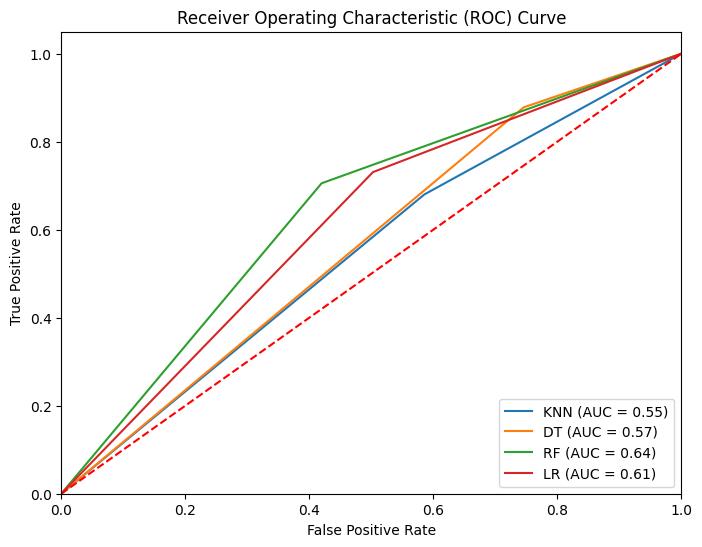

In [ ]:
models = [knn, dt, rf, lr]
model_names = ['KNN', 'DT', 'RF', 'LR']
accuracies = []
confusion_matrices = []
fprs = []
tprs = []
aucs = []
for model in models:
    y_pred = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))
    confusion_matrices.append(confusion_matrix(y_test, y_pred))
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    fprs.append(fpr)
    tprs.append(tpr)
    aucs.append(auc(fpr, tpr))
plt.figure(figsize=(8,6))
for i in range(len(models)):
    plt.plot(fprs[i], tprs[i], label=model_names[i] + " (AUC = {:.2f})".format(aucs[i]))
plt.plot([0, 1], [0, 1], 'k--', color="red")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

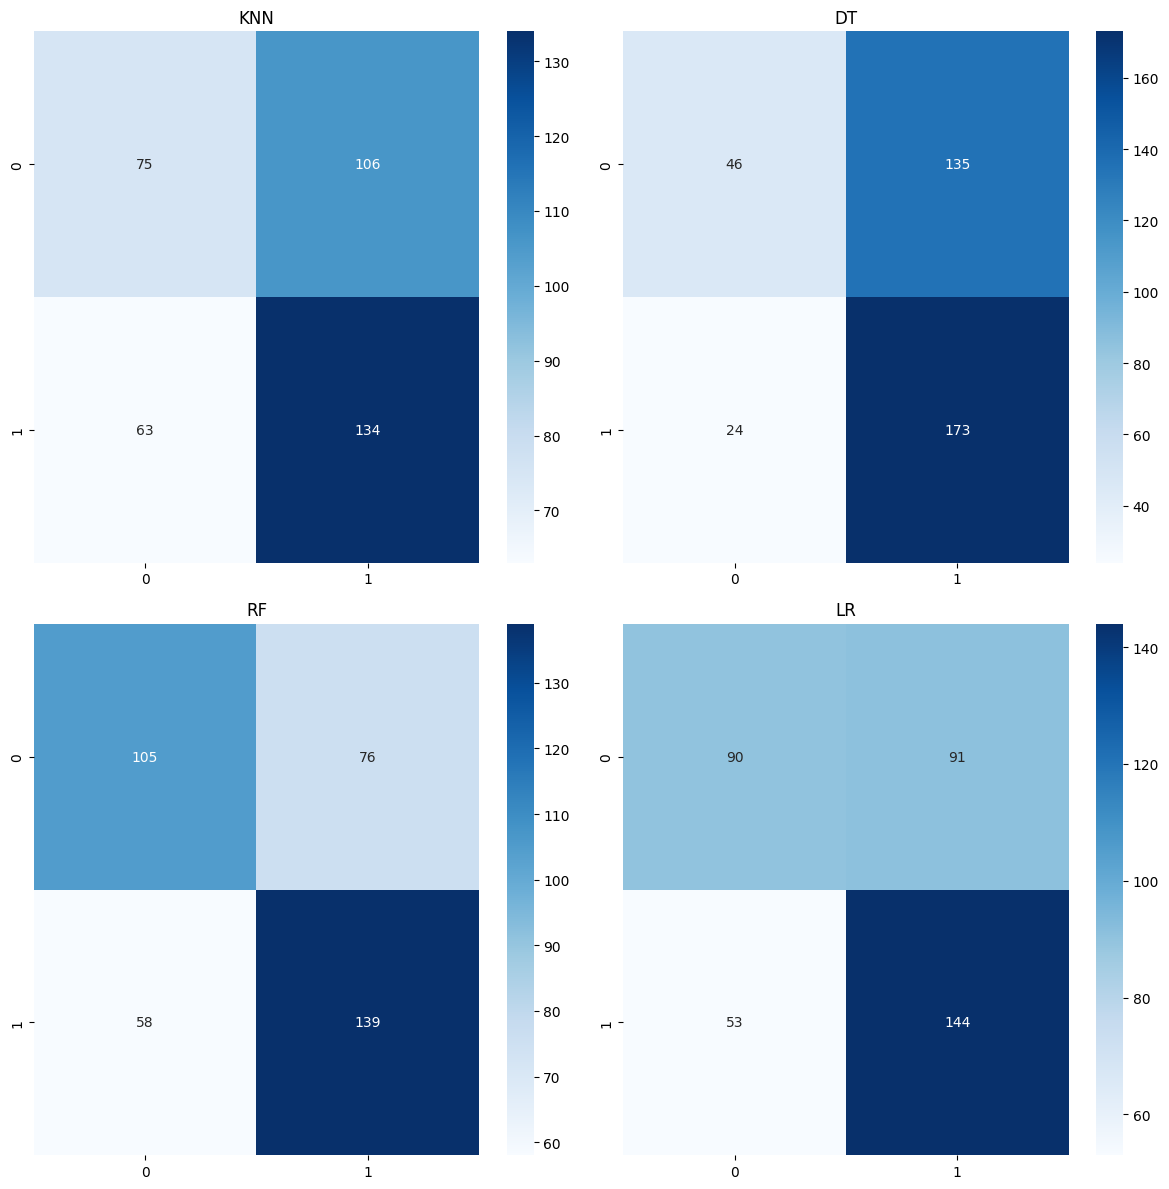

In [ ]:
# تولید داده‌ها برای چهار مدل
KNN = knn_matrix
DT = dt_matrix
RF = rf_matrix
LR = lr_matrix

# ستون ها و ردیف ها
rows = 2
columns = 2

# رسم چهار نمودار هیت‌مپ کنار هم
fig, axs = plt.subplots(rows, columns, figsize=(12, 12))

sns.heatmap(KNN, annot=True, cmap='Blues', fmt='g', ax=axs[0, 0])
axs[0, 0].set_title('KNN')

sns.heatmap(DT, annot=True, cmap='Blues', fmt='g', ax=axs[0, 1])
axs[0, 1].set_title('DT')

sns.heatmap(RF, annot=True, cmap='Blues', fmt='g', ax=axs[1, 0])
axs[1, 0].set_title('RF')

sns.heatmap(LR, annot=True, cmap='Blues', fmt='g', ax=axs[1, 1])
axs[1, 1].set_title('LR')

plt.tight_layout()
plt.show()

In [ ]:
accuracies=[acu4,acu1,acu2,acu3]
models = ['LOGREG', 'KNN', 'DT', 'RF']

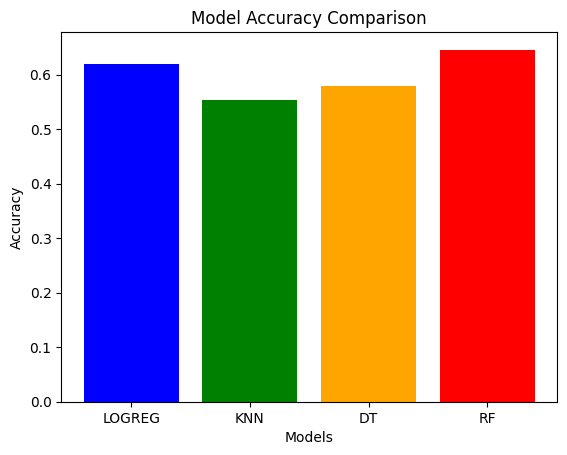

In [ ]:
plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()